In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
start_path = 'start.txt'

In [3]:
start=''
with open(start_path,'r') as f:
    start = f.read()
start = np.array(start.split(), dtype = np.float32)

In [4]:
start.shape

(50,)

In [5]:
A = np.identity(start.size, dtype = np. float32)-np.roll(np.identity(start.size, dtype = np. float32), -1, axis = 1)
A

array([[ 1.,  0.,  0., ...,  0.,  0., -1.],
       [-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]], dtype=float32)

In [6]:
T = np.identity(start.size)-0.5*A
T

array([[0.5, 0. , 0. , ..., 0. , 0. , 0.5],
       [0.5, 0.5, 0. , ..., 0. , 0. , 0. ],
       [0. , 0.5, 0.5, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.5, 0. , 0. ],
       [0. , 0. , 0. , ..., 0.5, 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0.5]])

In [7]:
frames = [start]
u = start
for i in range(1,256):
    u = np.dot(T, u)
    frames.append(u)

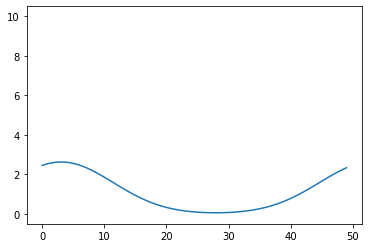

In [8]:
fig, ax = plt.subplots()
line, = ax.plot(range(start.size), start)

def anim(i):

    line.set_ydata(frames[i])
    return line,

ani = animation.FuncAnimation(
    fig, anim, interval=40, blit=True, save_count=255)

HTML(ani.to_jshtml())